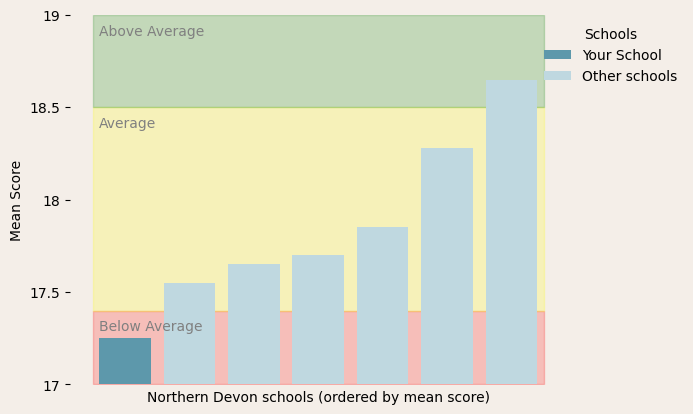

In [2]:

from typing import Literal
import pandas as pd
import ast
import matplotlib.pyplot as plt
import os
import math
import re
import csv
import io
from fake_school_comparison import School
from school_gtaphs.comparison_graph import make_comparison_graph

In [3]:
# Read in the RAG dataset
rag_df = pd.read_csv(
    "data/synthetic/standard/synthetic_standard_survey.standard_school_aggregate_scores_rag.0000000010000.csv"
)
rag_df.head()


,variable,mean,count,school_lab,year_group_lab,gender_lab,fsm_lab,sen_lab,total_pupils,group_n,group_wt_mean,group_wt_std,lower,upper,rag,variable_lab,description
0,autonomy_score,17.18421052631579,76.0,School A,All,All,All,All,490,7,17.808163,0.439816,17.368347,18.247979,below,Autonomy,\nHow 'in control' young people feel of their ...
1,life_satisfaction_score,5.050420168067227,119.0,School A,All,All,All,All,725,7,5.060690,0.339266,4.721424,5.399955,average,Life satisfaction,\nHow satisfied young people feel with their life
2,optimism_score,12.035714285714286,112.0,School A,All,All,All,All,731,7,12.032832,0.260359,11.772473,12.293191,average,Optimism,\nYoung people's hopefulness and confidence fo...
3,wellbeing_score,21.21505376344086,93.0,School A,All,All,All,All,547,7,20.934186,0.507017,20.427169,21.441204,average,Psychological wellbeing,\nHow positive and generally happy young peopl...
4,esteem_score,12.546666666666669,75.0,School A,All,All,All,All,481,7,12.773389,0.406382,12.367007,13.179771,average,Self-esteem,\nHow much young people value themselves


In [4]:
# Select relevant columns
# Create dictionary to store dfs for each school
# school_dfs: dict[str, pd.DataFrame] = {}

comparison_columns = [
    "variable",
    "mean",
    "rag",
    "school_lab",
    "year_group_lab",
    "gender_lab",
    "fsm_lab",
    "sen_lab",
    "group_wt_mean",
    "group_wt_std",
    "lower",
    "upper",
]
filtered_comparison_df = rag_df[comparison_columns]

SubGroups = Literal["all_pupils", "year_group", "gender", "fsm", "sen"]

# Split rag_df for each topic 

# Create dictionary to store dfs for each topic
topic_comparisons_df: dict[str, pd.DataFrame] = {}

# Create a list of unique topics
topics = filtered_comparison_df["variable"].unique()

# Iterate over each topic and create a df for "All pupils"
for topic in topics:
    topic_df = filtered_comparison_df[filtered_comparison_df["variable"] == topic]
    topic_comparisons_df[topic] = topic_df

    # Create a df for "All pupils"
    all_pupils_df = topic_df[
        (topic_df["year_group_lab"] == "All")
        & (topic_df["gender_lab"] == "All")
        & (topic_df["fsm_lab"] == "All")
        & (topic_df["sen_lab"] == "All")
    ]
    
    # Store the df for "All pupils" in the dictionary
    topic_comparisons_df[f"{topic}_all_pupils"] = all_pupils_df
 
# To view the DataFrame for 'Autonomy' for "All pupils", all schools
autonomy_all_pupils = topic_comparisons_df.get("autonomy_score_all_pupils")
autonomy_all_pupils.head()
list_of_automony_mean_scores = autonomy_all_pupils["mean"]
list_of_automony_mean_scores.to_list()

list_of_automony_mean_scores = [School(mean_topic_score=score) for score in list_of_automony_mean_scores]

figure = make_comparison_graph(
    schools=list_of_automony_mean_scores,
    range_low=topic_comparisons_df.get["lower"],
    range_high=topic_comparisons_df.get["upper"],
    y_label="Mean Autonomy Score",
    x_label="School",
    below_avg_amount=topic_comparisons_df.get["group_wt_mean"], # School mean?
    average_amount=topic_comparisons_df.get["group_wt_mean"], # School mean?
    current_school=School.topic_comparisons_df.get["mean_topic_score"]
)

plt.show()




TypeError: 'builtin_function_or_method' object is not subscriptable

In [118]:
# By year group

# Create dictionary to store dfs for each topic
topic_comparisons_df: dict[str, pd.DataFrame] = {}

# Iterate over each topic
for topic in topics:
    # Filter DataFrame for the current topic
    topic_df = filtered_comparison_df[filtered_comparison_df["variable"] == topic]

    # Filter by year groups (Year 8 and Year 10)
    year_group_comparison = topic_df[
        topic_df["year_group_lab"].isin(["Year 8", "Year 10"])
    ]

    # Create a DataFrame for each year group and store in the dictionary
    for year_group in year_group_comparison["year_group_lab"].unique():
        year_group_df = year_group_comparison[
            year_group_comparison["year_group_lab"] == year_group
        ]

        # Store the DataFrame in the dictionary, using topic and year group in the key
        topic_comparisons_df[f"{topic}_{year_group}"] = year_group_df

# To view the DataFrame for 'Autonomy' for "Year 8"
autonomy_year_8 = topic_comparisons_df.get("autonomy_score_Year 8")

# Display the first few rows of the DataFrame for 'Autonomy' in 'Year 8'
print(autonomy_year_8.head())




            variable                mean      rag school_lab year_group_lab  \
32    autonomy_score  16.594594594594593    below   School A         Year 8   
320   autonomy_score                  18  average   School B         Year 8   
608   autonomy_score  17.541666666666668  average   School C         Year 8   
896   autonomy_score  18.782608695652176    above   School D         Year 8   
1184  autonomy_score  17.225806451612904  average   School E         Year 8   

     gender_lab fsm_lab sen_lab  group_wt_mean  group_wt_std      lower  \
32          All     All     All       17.70155      0.644837  17.056713   
320         All     All     All       17.70155      0.644837  17.056713   
608         All     All     All       17.70155      0.644837  17.056713   
896         All     All     All       17.70155      0.644837  17.056713   
1184        All     All     All       17.70155      0.644837  17.056713   

          upper  
32    18.346388  
320   18.346388  
608   18.346388  
89

In [119]:
# By gender

# Iterate over each topic

for topic in topics:
    # Filter DataFrame for the current topic
    topic_df = filtered_comparison_df[filtered_comparison_df["variable"] == topic]

    # Filter by gender (Boy, Girl)
    gender_comparison = topic_df[
        topic_df["gender_lab"].isin(["Boy", "Girl"])
    ]

    # Create a DataFrame for each gender and store in the dictionary
    for gender in gender_comparison["gender_lab"].unique():
        gender_df = gender_comparison[
            gender_comparison["gender_lab"] == gender
        ]

        # Store the DataFrame in the dictionary, using topic and year group in the key
        topic_comparisons_df[f"{topic}_{gender}"] = gender_df

# To view the DataFrame for 'Optimism' for "Girl"
optimism_girl = topic_comparisons_df.get("optimism_score_Girl")

# Display the first few rows of the DataFrame for 'Optimism' for 'Girl'
print(optimism_girl.head())      


            variable                mean      rag school_lab year_group_lab  \
98    optimism_score  12.176470588235292  average   School A            All   
386   optimism_score  12.166666666666666  average   School B            All   
674   optimism_score  11.705882352941176  average   School C            All   
962   optimism_score                12.2  average   School D            All   
1250  optimism_score  11.642857142857142  average   School E            All   

     gender_lab fsm_lab sen_lab  group_wt_mean  group_wt_std      lower  \
98         Girl     All     All      11.819048      0.409579  11.409468   
386        Girl     All     All      11.819048      0.409579  11.409468   
674        Girl     All     All      11.819048      0.409579  11.409468   
962        Girl     All     All      11.819048      0.409579  11.409468   
1250       Girl     All     All      11.819048      0.409579  11.409468   

          upper  
98    12.228627  
386   12.228627  
674   12.228627  
96

In [120]:
# By FSM

# Iterate over each topic

for topic in topics:
    # Filter DataFrame for the current topic
    topic_df = filtered_comparison_df[filtered_comparison_df["variable"] == topic]

    # Filter by FSM status (FSM, Non-FSM)
    fsm_comparison = topic_df[topic_df["fsm_lab"].isin(["FSM", "Non-FSM"])]

    # Create a DataFrame for each gender and store in the dictionary
    for fsm in fsm_comparison["fsm_lab"].unique():
        fsm_df = fsm_comparison[fsm_comparison["fsm_lab"] == fsm]

        # Store the DataFrame in the dictionary, using topic and year group in the key
        topic_comparisons_df[f"{topic}_{fsm}"] = fsm_df

# To view the DataFrame for 'Wellbeing' for "FSM"
wellbeing_fsm = topic_comparisons_df.get("wellbeing_score_FSM")

# To view the DataFrame for 'Wellbeing' for "FSM"
print(wellbeing_fsm.head())


             variable                mean      rag school_lab year_group_lab  \
163   wellbeing_score                21.2  average   School A            All   
451   wellbeing_score   20.91891891891892  average   School B            All   
739   wellbeing_score   22.24242424242424    above   School C            All   
1027  wellbeing_score  20.806451612903224  average   School D            All   
1315  wellbeing_score            20.53125  average   School E            All   

     gender_lab fsm_lab sen_lab  group_wt_mean  group_wt_std      lower  \
163         All     FSM     All      20.988095      0.541987  20.446108   
451         All     FSM     All      20.988095      0.541987  20.446108   
739         All     FSM     All      20.988095      0.541987  20.446108   
1027        All     FSM     All      20.988095      0.541987  20.446108   
1315        All     FSM     All      20.988095      0.541987  20.446108   

          upper  
163   21.530083  
451   21.530083  
739   21.53008

In [121]:
# By SEN status

# Iterate over each topic
for topic in topics:
    # Filter DataFrame for the current topic
    topic_df = filtered_comparison_df[filtered_comparison_df["variable"] == topic]

    # Filter by SEN status ("SEN", "Non-SEN")
    sen_comparison = topic_df[topic_df["sen_lab"].isin(["SEN", "Non-SEN"])]

    # Create a DataFrame for each SEN status and store it in the dictionary
    for sen_status in sen_comparison["sen_lab"].unique():
        sen_df = sen_comparison[sen_comparison["sen_lab"] == sen_status]

        # Store the DataFrame in the dictionary, using topic and SEN status in the key
        topic_comparisons_df[f"{topic}_{sen_status}"] = sen_df

# To view the DataFrame for 'Wellbeing' for "SEN"
wellbeing_sen = topic_comparisons_df.get("wellbeing_score_SEN")

# Display the first few rows of the DataFrame for 'Wellbeing' for "SEN"
print(wellbeing_sen.head())


             variable                mean      rag school_lab year_group_lab  \
227   wellbeing_score   20.88888888888889  average   School A            All   
515   wellbeing_score                  \N      NaN   School B            All   
803   wellbeing_score  21.870967741935484    above   School C            All   
1091  wellbeing_score              20.625    below   School D            All   
1379  wellbeing_score  20.823529411764707  average   School E            All   

     gender_lab fsm_lab sen_lab  group_wt_mean  group_wt_std      lower  \
227         All     All     SEN      21.064516      0.372207  20.692309   
515         All     All     SEN      21.064516      0.372207  20.692309   
803         All     All     SEN      21.064516      0.372207  20.692309   
1091        All     All     SEN      21.064516      0.372207  20.692309   
1379        All     All     SEN      21.064516      0.372207  20.692309   

          upper  
227   21.436723  
515   21.436723  
803   21.43672

# Select "your school"

In [122]:
# Save the dfs (for gender/fsm/sen/year group, save one of each category

In [123]:
# Graph code 

    
# Save graphs in outputs / school / comparisons / [all_pupils, fsm, gender, sen, year_group] / [topic] / [topic]_[category].png

# Save each graph to the relevant folder
def save_graph(file_path):
    directory = os.path.dirname(file_path)
    if not os.path.exists(directory):
        os.makedirs(directory)
    plt.savefig(file_path, dpi=100)
    plt.close()

for topic in topics:
    # Ensure the directory exists
    output_dir = file_path(f"outputs/{school}/comparisons/{subgroup}/{topic}/{filename}")
    output_dir.mkdir(parents=True, exist_ok=True)

# Save the text below in each of the folders
# "# Print text: Your school had [n] complete responses. Across Northern Devon, there were [n] complete responses from [n] schools. The average score for the pupils at your school, compared to other schools in Northern Devon, was: [RAG]"

NameError: name 'file_path' is not defined